# 1. Problema de ordenamiento

**Entrada**: Secuencia de n números $[a_1,a_2,...,a_n]$

**Salida**: Un arreglo $[a_1',a_2',...,a_n']$ ordenado de menor a mayor, de tal manera que $a_1'\leq a_2' \leq... \leq a_n'$.

![image](https://i.imgur.com/MvYh5qf.png)

Este algoritmo se basa en un diseño conocido como **divide y vencerás** a diferencia de otros que hay por ahí, ya que, divide el arreglo en varios subarreglos que se irán fusionando para formar subarreglos ordenados hasta acabar con el arreglo ordenado de menor a mayor.

# 2. MergeSort

El siguiente código muestra una implementación del algoritmo **MergeSort**.

In [50]:
def merge(arrIzquier, b, comparaciones, verbose = False):
    i = 0 ##indice para recorrer arrIzquier
    j = 0 ##indice para recorrer arrDer
    c = []

    while i < len(arrIzquier) and j < len(b):
        if verbose == True:
          print("\nComparando", arrIzquier[i], "y", b[j])

        comparaciones += 1

        if arrIzquier[i] < b[j]:
            c.append(arrIzquier[i])

            if verbose == True: 
              print("Agregado valor", arrIzquier[i], "=>",c)

            i+=1

        else:
            c.append(b[j])

            if verbose == True: 
              print("Agregado valor", b[j], "=>",c)

            j+=1


    if verbose == True:
      print("Agregando el resto de valores.")
    while i < len(arrIzquier):
        c.append(arrIzquier[i])
        i+=1
        comparaciones += 1

    while j < len(b):
        c.append(b[j])
        j+=1
        comparaciones += 1
    
    if verbose == True:
      print("Arreglo ordenado:",c,"\n")

    return c, comparaciones

# MergeSort Code
def merge_sort(arr, recursiones = 0, comparaciones = 0, verbose = False):
    arrIzq = []
    arrDer = []
    if verbose == True: print("\nContador de Recursiones: ", recursiones)
    if verbose == True: print("Arreglo de entrada:", arr)

    if len(arr) == 1:
        if verbose == True: print("Arreglo es de largo 1")
        return arr, recursiones, comparaciones #El arreglo sólo tiene un elemento

    x = (int)((len(arr))/2) #El índice de la mitad del arreglo

    if verbose == True:
      print("Indice de la mitad:", x)
    if verbose == True:
      print("Dividiendo arreglo")

    if verbose == True:
      print("\nOrdenando izquierda:", arr[0:x])
    recursiones += 1
    arrIzq, recursiones, comparaciones = merge_sort(arr[0:x], recursiones, comparaciones, verbose) #Ordena la parte izquierda del arreglo

    if verbose == True:
      print("\nOrdenando derecha:", arr[x:len(arr)])
    recursiones += 1
    arrDer, recursiones, comparaciones = merge_sort(arr[x:len(arr)], recursiones, comparaciones, verbose) #Ordena la parte derecha del arreglo

    if verbose == True:
      print("\nJuntando", arrIzq, "con", arrDer)
    arr, comparaciones = merge(arrIzq, arrDer, comparaciones, verbose) #Combina y ordena ambos subarreglos ordenados

    return arr, recursiones, comparaciones


a = [38,27,43,3,9,82,10]
recursiones = 0
comparaciones = 0
print("Entrada: ",a)
a, recursiones, comparaciones = merge_sort(a, recursiones, comparaciones, False)
print("Salida: ",a)
print("Número de Recursiones:", recursiones)
print("Número de Comparaciones:", comparaciones)

Entrada:  [38, 27, 43, 3, 9, 82, 10]
Salida:  [3, 9, 10, 27, 38, 43, 82]
Número de Recursiones: 12
Número de Comparaciones: 20


## 2.2. Descripción del algoritmo
Este algoritmo consiste en la división del arreglo en partes cada vez más pequeñas para cumplir su objetivo.

El Merge Sort también utiliza la función Merge, que recibe como entrada 4 parámetros, "A", "p", "q" y "r". Aquí, "p", "q" y "r" son índices y "A" es el arreglo que queremos ordenar. Esta función asume que los subarreglos $A[p...q]$ y $A[q+1...r]$ vienen ordenados y los combina para acabar con un sólo arreglo ordenado.

Por lo que el MergeSort funcionaría de la siguiente manera:

1. Cuando entra en la función se obtiene el elemento medio del arreglo, y una vez obtenido, se llama a la misma función para repetir el proceso con los subarreglos de la izquierda y la derecha del arreglo.

2. Si el subarreglo que se está viendo es de un solo elemento el MergeSort se acaba y se pasa al Merge.

3. Como todos los subarreglos con los que quedamos son de un elemento, el Merge empieza a juntarlos ordenadamente acabando con un arreglo ordenado.

![image]()

Cuando la variable `verbose` es `True` se muestra información para ver lo que pasa paso a paso dentro de la función.

## 2.3. Ejemplo

Consideremos, por ejemplo, un arreglo de 7 elementos:

$a=[38,27,43,3,9,82,10]$

Dividimos el arreglo en uno de 4 y 3 elementos

[38,27,43,3] || [9,82,10]

Seguimos dividiendo de la misma manera hasta que ya no se pueda más, y acabamos con esto:

[38,27] | [43,3] | [9,82] | [10]

[38] | [27] || [43] | [3] || [9] | [82] || [10]

Una vez que llegamos al tamaño más pequeño que pueden tener los subarreglos, empezamos a usar el Merge para juntarlos de forma ordenada:

[27,38] || [3,43] ||| [9,82] || [10]

[3,27,38,43] | [9,10,82]

[3,9,10,27,38,43,82]

Y ya tenemos el arreglo ordenado.

## 2.4. Ejecución del Algoritmo Paso a Paso (verbose = True)

Al utilizar la opción `verbose=True` se puede ver paso a paso lo que le ocurre al arreglo en cada iteración del algoritmo.

In [59]:
a = [38,27,43,3,9,82,10]
recursiones = 0
counter = 0
print("Entrada: ",a)
a, recursiones, counter = merge_sort(a, recursiones, counter,True)
print("\nSalida: ",a)
print("Número de comparaciones:", counter)

Entrada:  [38, 27, 43, 3, 9, 82, 10]

Contador de Recursiones:  0
Arreglo de entrada: [38, 27, 43, 3, 9, 82, 10]
Indice de la mitad: 3
Dividiendo arreglo

Ordenando izquierda: [38, 27, 43]

Contador de Recursiones:  1
Arreglo de entrada: [38, 27, 43]
Indice de la mitad: 1
Dividiendo arreglo

Ordenando izquierda: [38]

Contador de Recursiones:  2
Arreglo de entrada: [38]
Arreglo es de largo 1

Ordenando derecha: [27, 43]

Contador de Recursiones:  3
Arreglo de entrada: [27, 43]
Indice de la mitad: 1
Dividiendo arreglo

Ordenando izquierda: [27]

Contador de Recursiones:  4
Arreglo de entrada: [27]
Arreglo es de largo 1

Ordenando derecha: [43]

Contador de Recursiones:  5
Arreglo de entrada: [43]
Arreglo es de largo 1

Juntando [27] con [43]

Comparando 27 y 43
Agregado valor 27 => [27]
Agregando el resto de valores.
Arreglo ordenado: [27, 43] 


Juntando [38] con [27, 43]

Comparando 38 y 27
Agregado valor 27 => [27]

Comparando 38 y 43
Agregado valor 38 => [27, 38]
Agregando el resto 

# 3. Correctitud


## 3.1. Teorema (Correctitud)

El algoritmo **Merge** genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos de los subarreglos de entrada ordenados de menor a mayor, es decir, $a_1'\leq a_2' \leq... \leq a_n'$.

## 3.2. Prueba del Teorema

El merge obtiene el largo del subarreglo $A[p..q]$ y $A[q+1..r]$ y crea arreglos L y R (que contendrán los lados izquierdos y derechos respectivamente) para el lado izquierdo y derecho del arreglo de largo $n_1 + 1$ y $n_2 + 1$ respectivamente. Los elementos del arreglo A que correspondan se copiarán dentro de estos dos subarreglos y luego estos se fusionarán de forma que el arreglo resultante esté ordenado comparando los elementos de los subarreglos que correspondan

> Al comienzo de cada iteración el subarreglo $A[p .. k-1]$ contiene los $k - p$ elementos más pequeños de $L[1 .. n_1 + 1]$ y $R[1 .. n_2 + 1]$ de forma ordenada. Por lo que L[i] y R[j] serían los elementos más pequeños de dichos arreglos que no han sido copiados en A.

### Inicialización

Antes de la primera iteración del ciclo los primeros elementos de los subarreglos L y R corresponden a los menores elementos de los arreglos en los que se encuentran que no han sido copiados en el arreglo final.


### Mantención

Para que cada iteración mantenga la invariante de bucle, se comparan los elementos seleccionados de los arreglo L y R que corresponderían a L[i] y R[j]. Supongamos que en este caso L[i] < R[j], en tal caso, L[i] se copia en A[k] (k siendo la posición actual a la que correspondería el elemento), luego el valor de "i" y "k" aumenta en 1, para reestablecer la invariante de ciclo para la siguiente iteración. En el caso de que R[j] < L[i] se repetiría el proceso, pero adaptado para el lado que corresponde para mantener invariante de ciclo.

### Correctitud

Al final los dos subarreglos deberían estar copiados en el arreglo A de forma que sus elementos estén ordenados de menor a mayor.




### 3.3 Inducción para la correctitud del MergeSort
La hipótesis $P(n)$ se basa en que Merge Sort retorna un arreglo de $n$ elementos ordenados de menor a mayor.

### Caso base $n = 1$
Si $P(1)$ la función MergeSort retorna un sólo elemento, por lo que se cumpliría la condición,

### Paso inductivo
Ahora hay que probar que si $P(m)$ es verdadero para $m < n$, entonces lo será también para $P(n)$.

Si tenemos un arreglo de n elementos, el algoritmo partirá ese arreglo en $m_1 = [n/2]$ y $m_2 = [n/2]$ y los ordenará usando MergeSort. Luego podemos asumir que los arreglos serán ordenados correctamente.

Luego los arreglos serán fusionados con la función merge. Que según lo mencionado anteriormente retornará la combinación de los arreglos con los elementos ordenados de menor a mayor. Por lo tanto MergeSort es correcto.

# 4. Tiempo de ejecución

### **Teorema (Tiempo de ejecución).**

*El algoritmo **MergeSort** tiene un **tiempo de ejecución de** $O(nlog(n))$ todos los casos.*

## Prueba del teorema 

Antes de acudir al árbol de recurrencia, primero debemos sacar la fórmula de recurrencia del algoritmo.

### Fórmula de recurrencia
Para facilitarnos las cosas, asumiremos que $n$ (el tamaño del problema) es potencia de 2. Ahora:
>MergeSort divide cada problema en $a = 2$, hasta que no pueda más. Por lo que tardará $2T(n/2)$ en resolver los subproblemas.

>Para dividir los arreglos en 2 el algoritmo se tarda $O(1)$ que es constante de tiempo

>La complejidad de la función merge es lineal, por tanto sería $O(n)$

Por lo tanto la fórmula de recurrencia sería:
$T(n) = 2T(n/2) + O(n)$

### Árbol de recurrencia
Ahora que tenemos la fórmula de recurrencia, podemos usar el árbol para obtener la complejidad.

El árbol irá subdividiendo cada paso $T(n)$ recursivamente en sus componentes, o sea $T(n) = 2T(n/2) + n$.

![image](https://i.imgur.com/Hb6SguM.png)

In [ ]:
a = [8,6,2,9,3]
counter = 0
counter2 = 0
print("Entrada: ",a)
a, counter, counter2 = merge_sort(a, counter, counter2, True)
print("\nSalida: ",a)
print("Número de Recursiones:", counter)

# 5. Experimentos

## 5.1. Número de movimientos

La gráfica de acontinuación muestra una comparación entre:

* la cantidad de movimientos realizados en el peor caso calculadas matemáticamente,
* la cantidad de movimientos realizados en el mejor caso calculadas matemáticamente
* y la cantidad de movimientos realizados en casos de prueba realizados con entradas aleatorias

para problemas con arreglos de entrada de largo $n \in [5,20]$ en los cuales el valor de los elementos es elejido aleatoriamente desde un conjunto de números entre 1 y 100.

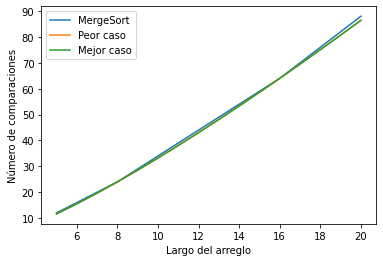

In [55]:
import matplotlib.pyplot as plt
import math
import random

asd = 0

x=[n for n in range(5,21)]
# Peor Caso
y1=[n * math.log2(n) for n in range(5,21)]
# Mejor caso
y2=[n * math.log2(n) for n in range(5,21)]
# Muestras
y=[]; 
counter = 0

for n in range(5,21):
  a = random.sample(range(1, 100), n)
  counter = 0
  a, asd, counter = merge_sort(a, counter, False)
  y.append(counter)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["MergeSort", "Peor caso", "Mejor caso"])

plt.xlabel('Largo del arreglo')
plt.ylabel('Número de comparaciones')
plt.show()

### Análisis del gráfico

Este gráfico ocurre de esta manera, en parte porque se considera como comparación no solo a cuando se compara directamente un elemento con el otro, sino que también a cada vez que un elemento se ingresa en el arreglo. Luego, como la complejidad del MergeSort es $nLog_2(n)$ en cualquier caso, se coloca eso para el mejor y peor caso, dando el resultado que se muestra por pantalla.

# 6.3. Comparación de tiempo de ejecución de MergeSort con InsertSort

El siguiente gráfico muestra una comparación entre los tiempos de ejecución de los algoritmos **MergeSort** e **InsertSort**.


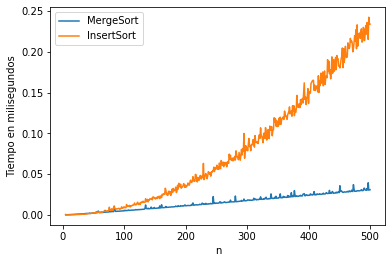

In [60]:
import datetime
import random
from timeit import repeat

# Código para bubblesort
def insert_sort(arr, verbose=False):
    counter = 0
    lenght = len(arr)

    if verbose == True: 
      print("input array:", arr)

    for i in range(1,lenght):
        c = i
        if verbose == True: 
          print("\nIteración",i)
        while arr[c] < arr[c-1] and c > 0:
            counter+=1
            arr[c], arr[c-1] = arr[c-1], arr[c]
            c-=1
            if verbose == True: 
              print("\n",arr)
        if verbose == True: 
          print("\nFin de la iteración",i)
# Fin del código de bubblesort

x=[];
y=[];
yb=[];

for n in range(5,501):
  a = random.sample(range(1, 1000), n)
  x.append(n)

  #la función repeat está ejecutando 20 veces insert_sort con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import merge_sort", stmt=f"merge_sort({a})", repeat=1, number=10)
  y.append(t)
  t = repeat(setup="from __main__ import insert_sort", stmt=f"insert_sort({a})", repeat=1, number=10)
  yb.append(t)

plt.plot(x,y)
plt.plot(x,yb)
plt.legend(["MergeSort", "InsertSort"])

plt.xlabel('n')
plt.ylabel('Tiempo en milisegundos')
plt.show()

### Analisis del gráfico

En el gráfico se puede apreciar que el algoritmo **MergeSort** tiene un menor tiempo de ejecución promedio en comparación a **InsertSort**, y esta diferencia se hace cada vez mayor, lo que significa que el algotirmo **MergeSort** es mejor mientras más grande sea el arreglo de entrada. Y es más debido a lo poco que tiende a variar el tiempo del MergeSort en comparación con el InsertionSort, el primero podría ser una solución mucho más consistente para el ordenamiento de elementos en un arreglo.